### Zadanie 1

Zaimplementuj generator liniowy kongruentny wg wzoru:
$$X_{i+1}=(aX_i+c)\ mod\ m$$
Generator ma zwracać wartości w zakresie [0...1], wartości startowe wg własnego wyboru. 

In [0]:
import matplotlib.pyplot as plt

def quasi_random(a, c, m, seed):
    return (a * seed + c) % m


def generate(n, a, c, m, seed):
    result = []
    for _ in range(n):
        seed = quasi_random(a, c, m, seed)
        result.append(seed/m)
    return result


Przetestuj jego działanie dla różnych zestawów parametrów:

|     a         |   c           | m         |
| ------------- |:-------------:| ---------:|
|  1103515245   | 12345         |$$2^{32}$$ |
| 1229          | 1             | $$2048$$  |
| 1597          | 51749         | $$24494$$ |
| $2^{16}+3$    | 0             | $ 2^{31}$ |

Zwizualizuj rozkład generowanych liczby (histogram lub lepiej chmura punktów 2-D lub 3D ($X_i, X_{i+1}$), ($X_i, X_{i+1}, X_{i+2}$)). Oceń jakość generowanych rozkładów. 

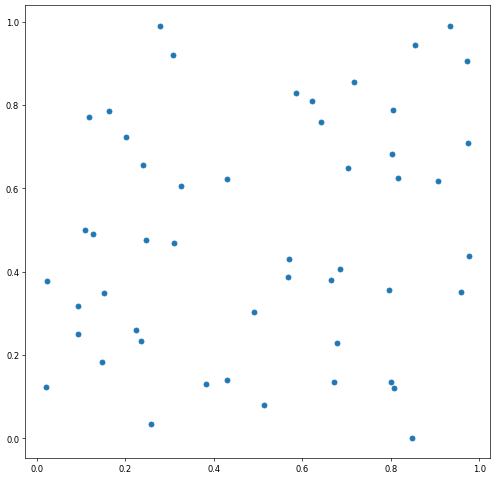

In [24]:
arr1 = generate(100, 1103515245, 12345, 2**32, 10)

x1 = [arr1[i] for i in range(len(arr1)) if i % 2 == 0]
y1 = [arr1[i] for i in range(len(arr1)) if i % 2 == 1]

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x1, y1)
plt.show()

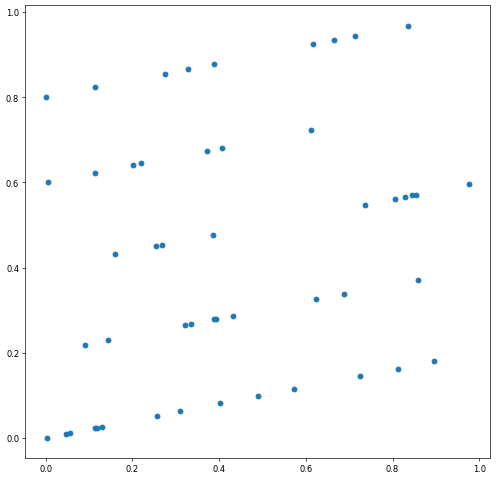

In [26]:
arr2 = generate(100, 1229, 1, 2048, 10)

x2 = [arr2[i] for i in range(len(arr2)) if i % 2 == 0]
y2 = [arr2[i] for i in range(len(arr2)) if i % 2 == 1]

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x2, y2)
plt.show()

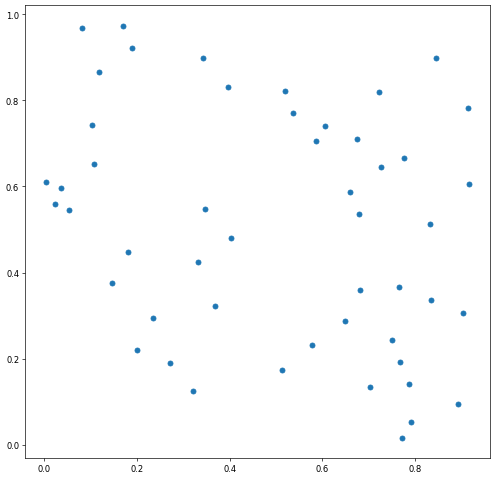

In [27]:
arr3 = generate(100, 1597, 51749, 24494, 10)

x3 = [arr3[i] for i in range(len(arr3)) if i % 2 == 0]
y3 = [arr3[i] for i in range(len(arr3)) if i % 2 == 1]

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x3, y3)
plt.show()

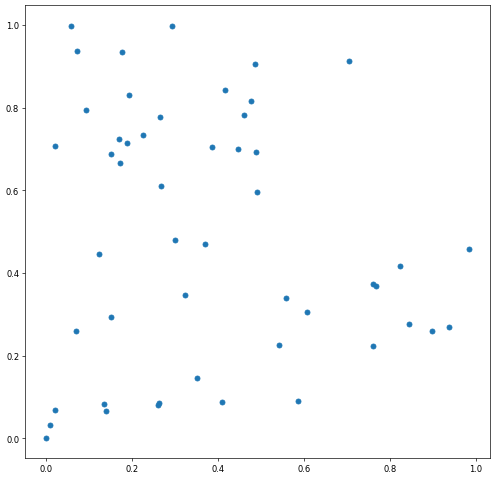

In [32]:
arr4 = generate(100, 2**16 + 3, 0, 2**31, 10)

x4 = [arr4[i] for i in range(len(arr4)) if i % 2 == 0]
y4 = [arr4[i] for i in range(len(arr4)) if i % 2 == 1]

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x4, y4)
plt.show()

Generowany rozkład (w szczególności dla przypdaku 2) pozostawia wiele do życzenia. Jest to spowodowane pseudolosowością generowanych liczb, co z kolei skutkuje powstawaniem podobnych do siebie sekwencji.

### Zadanie 2
Zapoznaj się z generetorem dostępnym w bibliotece numpy. Opisz krótko jaki to generator i jak działa. Przeanalizuj generowany przez niego rozkład podobnie jak w poprzednim zadaniu. 

Generator dostępny w bibliotece numpy to generator wykorzystujący algorytm $Mersenne$ $Twister$. Jest to szybki generator zwracający liczby pseudolosowe dobrej jakości - czyli zapewnie wysoki stopień równomiernego rozmieszczenia losowanych wartości, dzięki używanemu okresowi wynoszącemu $2^{199937} - 1$. Generator oparty został na liniowej rekurencji macierzowej w skończonej dziedzinie binarnej.

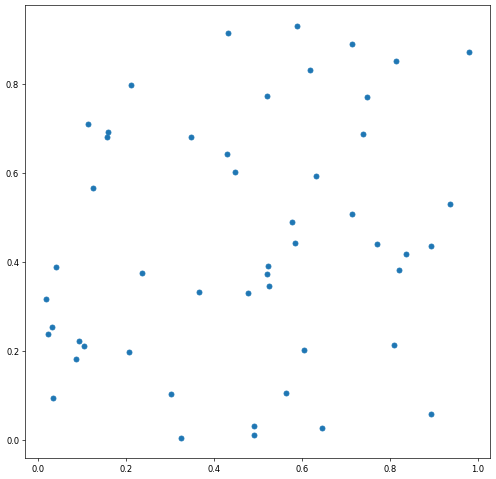

In [40]:
from numpy import random

arr = []

for _ in range(100):
  arr.append(random.random())

x = [arr[i] for i in range(len(arr)) if i % 2 == 0]
y = [arr[i] for i in range(len(arr)) if i % 2 == 1]

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x, y)
plt.show()

Powyższy wykres obrazuje lepszy jakościowo rozkład pseudolosowy. Punkty są równomierniej rozmieszczone i w zasadzie nie jesteśmy w stanie wskazać obszarów schematycznej koncentracji punktów na tych samych liniach.

### Zadanie 3
Zaimplementuj metodą całkowania Monte Carlo i zastosuj ją wobec następujących całek:
$$ \int_1^2 \frac{1}{x^2}\ dx $$
$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $$
$$ \int_1^{22} x^2+2x\ dx $$


In [0]:
def monte_carlo_integral(func, a, b, n):
    result = 0.0
    for _ in range(n):
        result += func(random.uniform(a, b))
    return (b-a)/float(n)*result

In [58]:
import scipy.integrate as integrate
from tabulate import tabulate
import numpy as np

func1 = lambda x : 1 / (x**2)
func2 = lambda x: 1 / np.sqrt(x**5+8)
func3 = lambda x: x**2 + 2*x

table = [
           ["1 / (x**2)", '(1, 2)', monte_carlo_integral(func1, 1, 2, 1000), integrate.quad(f1, 1, 2)[0]],
           ["1 / np.sqrt(x**5+8)", '(1,6)', monte_carlo_integral(func2, 1, 6, 1000), integrate.quad(f2, 1, 6)[0]],
           ["x**2 + 2*x", '(1, 22)', monte_carlo_integral(func3, 1, 22, 1000), integrate.quad(f3, 1, 22)[0]]
]

print(tabulate(table, headers=['Function', 'Interval', 'Monte Carlo', 'Scipy'], floatfmt=".8f", tablefmt="fancy_grid"))

╒═════════════════════╤════════════╤═══════════════╤═══════════════╕
│ Function            │ Interval   │   Monte Carlo │         Scipy │
╞═════════════════════╪════════════╪═══════════════╪═══════════════╡
│ 1 / (x**2)          │ (1, 2)     │    0.50442017 │    0.50000000 │
├─────────────────────┼────────────┼───────────────┼───────────────┤
│ 1 / np.sqrt(x**5+8) │ (1,6)      │    0.44301867 │    0.43505972 │
├─────────────────────┼────────────┼───────────────┼───────────────┤
│ x**2 + 2*x          │ (1, 22)    │ 4023.78005349 │ 4032.00000000 │
╘═════════════════════╧════════════╧═══════════════╧═══════════════╛


Oblicz także objętości brył:
- kula o promioniu 5
- stożek o wysokości 10 i promieniu podstawy 10
- bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.

Przeanalizuj jak wybór liczby próbek wpływa na wyniki obliczeń. 



Korzystając z zależności $\frac{n}{N} = \frac{V1}{V2} $, gdzie:

- n - liczba wylosowanych punktów zawierających się w bryle
- N - liczba wylosowanych punktów zawartych w prostopadłościanie ograniczającym bryłę
- V1 - szukana objętość (objętość bryły)
- V2 - objętość prostopadłościanu ograniczającego bryłę

po jednym przekształceniu otrzymuję wzór na szukaną objętość: $V1 = \frac{n}{N}*V2$

In [0]:
def ball_volume(R, N):
  n = 0
  cube_volume = (2*R)**3
  for _ in range(N):
    x = random.uniform(-R, R)
    y = random.uniform(-R, R)
    z = random.uniform(-R, R)
    if x ** 2 + y ** 2 + z ** 2 <= R ** 2: #check if the ball includes the point
      n += 1
  return (n / N) * cube_volume

In [107]:
R = 5
numpy_volume = 4/3 * np.pi * R**3 

table = [
           ["128", ball_volume(R, 128), numpy_volume],
           ["512", ball_volume(R, 512), numpy_volume],
           ["2048", ball_volume(R, 2048), numpy_volume],
           ["8192", ball_volume(R, 8192), numpy_volume],
           ["16384", ball_volume(R, 16384), numpy_volume]
]

print("kula o promieniu 5:")
print(tabulate(table, headers=['points', 'calculated volume', 'nupy volume'], floatfmt=".8f", tablefmt="fancy_grid"))

kula o promieniu 5:
╒══════════╤═════════════════════╤═══════════════╕
│   points │   calculated volume │   nupy volume │
╞══════════╪═════════════════════╪═══════════════╡
│      128 │        632.81250000 │  523.59877560 │
├──────────┼─────────────────────┼───────────────┤
│      512 │        500.00000000 │  523.59877560 │
├──────────┼─────────────────────┼───────────────┤
│     2048 │        532.71484375 │  523.59877560 │
├──────────┼─────────────────────┼───────────────┤
│     8192 │        522.82714844 │  523.59877560 │
├──────────┼─────────────────────┼───────────────┤
│    16384 │        523.86474609 │  523.59877560 │
╘══════════╧═════════════════════╧═══════════════╛


In [0]:
def cone_volume(R, H, N):
  n = 0
  cube_volume = (2*R)**2*H
  for _ in range(N):
    x = random.uniform(-R, R)
    y = random.uniform(-R, R)
    z = random.uniform(-R, R)
    if x ** 2 + y ** 2 <= ((z * R) / H) ** 2: #check if the cone includes the point
      n += 1
  return (n / N) * cube_volume

In [106]:
R = 10
H = 10
numpy_volume = 1/3 * np.pi * R**2 * H 

table = [
           ["128", cone_volume(R, H, 128), numpy_volume],
           ["512", cone_volume(R, H, 512), numpy_volume],
           ["2048", cone_volume(R, H, 2048), numpy_volume],
           ["8192", cone_volume(R, H, 8192), numpy_volume],
           ["16384", cone_volume(R, H, 16384), numpy_volume]
]

print("stożek o wysokości 10 i promieniu podstawy 10:")
print(tabulate(table, headers=['points', 'calculated volume', 'nupy volume'], floatfmt=".8f", tablefmt="fancy_grid"))

stożek o wysokości 10 i promieniu podstawy 10:
╒══════════╤═════════════════════╤═══════════════╕
│   points │   calculated volume │   nupy volume │
╞══════════╪═════════════════════╪═══════════════╡
│      128 │        687.50000000 │ 1047.19755120 │
├──────────┼─────────────────────┼───────────────┤
│      512 │       1000.00000000 │ 1047.19755120 │
├──────────┼─────────────────────┼───────────────┤
│     2048 │       1044.92187500 │ 1047.19755120 │
├──────────┼─────────────────────┼───────────────┤
│     8192 │       1056.15234375 │ 1047.19755120 │
├──────────┼─────────────────────┼───────────────┤
│    16384 │       1046.38671875 │ 1047.19755120 │
╘══════════╧═════════════════════╧═══════════════╛


In [0]:
def in_ball(x, y, z, R):
    return x ** 2 + y ** 2 + z ** 2 <= R ** 2

def in_cylinder(x, y, z, R, H):
    return x ** 2 + y ** 2 <= R ** 2 and z >= -H / 2 and z <= H / 2

def ball_cylinder_difference_volume(R_ball, R_cylinder, H, N):
  n = 0
  block_volume = (2*R_ball)**3
  for _ in range(N):
    x = random.uniform(-R, R)
    y = random.uniform(-R, R)
    z = random.uniform(-R, R)
    if in_ball(x, y, z, R_ball) and not in_cylinder(x, y, z, R_cylinder, H): #check if point is in the ball and is not in the cylinder
      n += 1
  return (n / N) * block_volume    

In [103]:
R_ball = 10
R_cylinder = 3
H = 6
numpy_volume = 4/3 * np.pi * R_ball**3 - np.pi * R_cylinder ** 2 * H 

table = [
           ["128", ball_cylinder_difference_volume(R_ball, R_cylinder, H, 128), numpy_volume],
           ["512", ball_cylinder_difference_volume(R_ball, R_cylinder, H, 512), numpy_volume],
           ["2048", ball_cylinder_difference_volume(R_ball, R_cylinder, H, 2048), numpy_volume],
           ["8192", ball_cylinder_difference_volume(R_ball, R_cylinder, H, 8192), numpy_volume],
           ["16384", ball_cylinder_difference_volume(R_ball, R_cylinder, H, 16384), numpy_volume]
]

print("bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3:")
print(tabulate(table, headers=['points', 'calculated volume', 'nupy volume'], floatfmt=".8f", tablefmt="fancy_grid"))

bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3:
╒══════════╤═════════════════════╤═══════════════╕
│   points │   calculated volume │   nupy volume │
╞══════════╪═════════════════════╪═══════════════╡
│      128 │       3500.00000000 │ 4019.14420149 │
├──────────┼─────────────────────┼───────────────┤
│      512 │       3953.12500000 │ 4019.14420149 │
├──────────┼─────────────────────┼───────────────┤
│     2048 │       4015.62500000 │ 4019.14420149 │
├──────────┼─────────────────────┼───────────────┤
│     8192 │       4094.72656250 │ 4019.14420149 │
├──────────┼─────────────────────┼───────────────┤
│    16384 │       4023.43750000 │ 4019.14420149 │
╘══════════╧═════════════════════╧═══════════════╛


Dokładność obliczeń rośnie wraz z ilością losowanych funkcji.